<h1 align=center><font size = 10>  </font></h1>

# Tập dữ liệu

Pima là một tộc người Mỹ bản địa sống ở Arizona. Yếu tố di truyền cho phép nhóm người này có thể tồn tại được với chế độ ăn nghèo carbohydrate trong nhiều năm. Những năm gần đây, do sự chuyển đổi đột ngột từ cây nông nghiệp truyền thống sang thực phẩm chế biến cùng với sự suy giảm hoạt động thể chất đã khiến tỷ lệ mắc bệnh tiểu đường loại 2 cao nhất, cho nên nó trở thành đối tượng của nhiều nghiên cứu.

Tập dữ liệu gồm dữ liệu từ 768 phụ nữ với 8 đặc điểm, cụ thể:

- Số lần mang thai
- Nồng độ đường huyết sau 2 giờ trong xét nghiệm dung nạp glucose đường uống
- Huyết áp tâm trương (mm Hg)
- Độ dày của nếp gấp da (mm)
- Insulin huyết thanh trong 2 giờ (mu U/ml)
- Chỉ số BMI (trọng lượng tính bằng kg/(chiều cao tính bằng m)^2)
- Chức năng phả hệ bệnh tiểu đường
- Tuổi (năm)
- Cột cuối cùng của tập dữ liệu cho biết một người có bị chẩn đoán mắc bệnh tiểu đường (1) hay không (0)

# Thư viện cần thiết

In [1]:
# Import các thư viện thiết yếu cho project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load dữ liệu từ file CSV  

### Task 1: Đọc dữ liệu 

Do file không chứa tên cột/đặc trưng, do đó hãy thêm tên cột bằng cách sử dụng mô tả từ trang web tập dữ liệu gốc:

Tên cột lần lượt là: "NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"

In [2]:
# Đặt tên cột/ đặc trưng
df = pd.read_csv("pima-indians-diabetes.csv", header = None)
df.columns = ["NumTimesPrg", 
              "PlGlcConc", 
              "BloodP", 
              "SkinThick", 
              "TwoHourSerIns", 
              "BMI",
              "DiPedFunc",
              "Age", 
              "HasDiabetes"]
df

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Trực quan hóa và tiền xử lý dữ liệu



## Ma trận tương quan dữ liệu

Ma trận tương quan là một công cụ quan trọng để hiểu mối tương quan giữa các đặc trưng, đặc điểm khác nhau. 

Các giá trị sẽ nằm trong khoảng từ -1 đến 1; giá trị càng gần 1 thì càng có giữa hai đặc điểm càng có mối tương quan tốt.

### Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [3]:
# Tính toán mối tương quan theo từng cặp giá trị của các cột, loại trừ giá trị NA/null
df_coor = df.corr() # correlation
df_coor

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

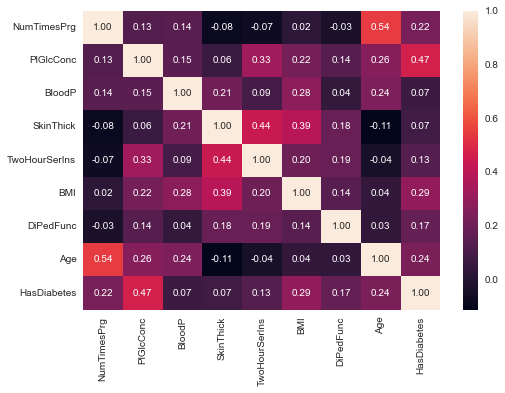

In [4]:
import seaborn as sns 
plt.style.use('seaborn')

heat = sns.heatmap(data = df_coor, annot = True, fmt= ".2f")
plt.show()

## Trực quan hóa tập dữ liệu

Trực quan hóa dữ liệu là một bước quan trọng của phân tích dữ liệu. 

Nhờ có trực quan hóa dữ liệu, chúng ta sẽ hiểu rõ hơn về các phân phối giá trị đặc trưng khác nhau: ví dụ: chúng ta nắm được độ tuổi trung bình của mọi người hoặc chỉ số BMI trung bình,...

Tất nhiên, chúng ta có thể giới hạn việc xem xét hiển thị bảng, nhưng điều này cũng đồng nghĩa với việc chúng ta có thể sẽ bỏ lỡ những yếu tố quan trọng có thể ảnh hưởng đến độ chính xác của mô hình.

### Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

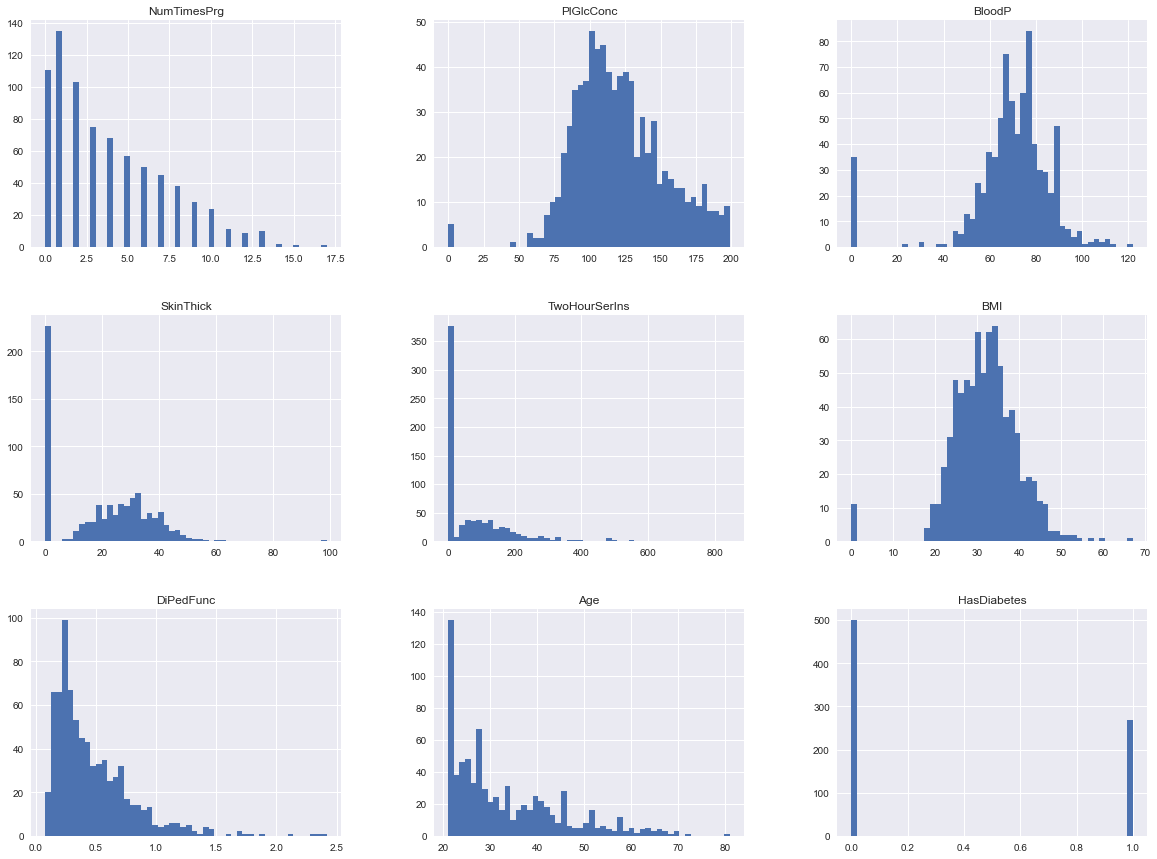

In [5]:
# Thao tác biểu đồ tần suất với tất cả cột tập dữ liệu
hist = df.hist(bins = 50, figsize=(20,15))

Tôi nhận thấy trong tập dữ liệu (điều này không rõ ràng ngay từ đầu) là thực tế một số người có giá trị null (không) cho một số đặc trưng: BMI hoặc huyết áp không hoàn toàn là 0.

Làm thế nào để xử lý các giá trị tương tự? Hãy xem phần sau trong giai đoạn biến đổi dữ liệu.

## Làm sạch và biến đổi dữ liệu

Từ phân tích trước, chúng ta đã nhận thấy một số bệnh nhân bị thiếu dữ liệu ở một số đặc trưng. Các thuật toán ML hoạt động không hiệu quả khi dữ liệu bị khuyết, vì vậy chúng ta phải tìm cách để "làm sạch" dữ liệu hiện có.
 
Cách dễ nhất là loại bỏ tất cả những bệnh nhân có giá trị null/0, nhưng nếu làm theo cách này, chúng ta cũng sẽ loại bỏ rất nhiều dữ liệu quan trọng.

Cách khác là thay thế giá trị null/0 bằng giá trị trung bình của cột dữ liệu đó. Hãy xem làm thế nào để áp dụng phương pháp thứ hai này.

### Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

Chúng tôi chưa chuyển đổi tất cả các cột vì một số giá trị có thể là 0 (như "Số lần mang thai").

In [6]:
# Kiểm tra các giá trị NA và 0 trong DataFrame
print('Tổng các giá trị NA trong DataFrame: \n', df.isna().sum())
print('\nTổng các giá trị 0 trong DataFrame: \n', (df == 0).sum())

Tổng các giá trị NA trong DataFrame: 
 NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

Tổng các giá trị 0 trong DataFrame: 
 NumTimesPrg      111
PlGlcConc          5
BloodP            35
SkinThick        227
TwoHourSerIns    374
BMI               11
DiPedFunc          0
Age                0
HasDiabetes      500
dtype: int64


In [7]:
# Gán giá trị bị khuyết trong list bằng trung vị thay cho giá trị trong cột là 0
# Trung vị là số ở giữa trong một list các số tăng dần hoặc giảm dần và có thể mô tả nhiều hơn về tập dữ liệu so với giá trị trung bình.
zero_list = ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] 
for i in zero_list:
    df[i].replace(0, np.nan, inplace = True)
    med = df[i].median(skipna = True)
    df[i].replace(np.nan, med, inplace = True)

In [8]:
df[zero_list].min()

BMI              18.2
BloodP           24.0
PlGlcConc        44.0
SkinThick         7.0
TwoHourSerIns    14.0
dtype: float64

## Chuẩn hóa dữ liệu


Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling). 

Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. 

    Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần áp dụng một phép biến đổi thích hợp.
    
Chuẩn hóa dữ liệu là scale dữ liệu về một phân bố trong đó giá trị trung bình của các quan sát bằng 0 và độ lệch chuẩn = 1. 

(Theo https://machinelearningcoban.com/general/2017/02/06/featureengineering/)

### Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1.

In [9]:
y = df['HasDiabetes'] # cột kết quả, tách và gán giá trị cho biến y
X = df.drop(columns = 'HasDiabetes', axis=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [10]:
y.head() # giá trị cột y

0    1
1    0
2    1
3    0
4    1
Name: HasDiabetes, dtype: int64

## Phân tách dữ liệu

Bây giờ dữ liệu đã được chuyển đổi, chúng ta cần chia tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra. 

**Phân tách tập dữ liệu** là một bước rất quan trọng đối với các mô hình học máy có giám sát. 

Về cơ bản, chúng ta sẽ sử dụng phần đầu tiên để huấn luyện mô hình (bỏ qua cột có nhãn được gán trước), sau đó sử dụng mô hình đã huấn luyện để đưa ra dự đoán về dữ liệu mới (là tập dữ liệu kiểm tra, không phải là một phần của tập huấn luyện) và so sánh giá trị dự đoán với nhãn đã được chỉ định

### Task 7: Tách tập dữ liệu train/test tỉ lệ 80/20

- test_size = 20%
- random_state=7.

In [11]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu với test_size = 20% và random_state = 7.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7, stratify = y)

In [12]:
print('Shape của tập train:',X_train.shape, y_train.shape)
print('Shape của tập test:',X_test.shape, y_test.shape)

Shape của tập train: (614, 8) (614,)
Shape của tập test: (154, 8) (154,)


**Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?**

<font color='blue'>

**Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling).**    
    
1. Sự phân bố không đồng đều của các trọng số nên dẫn tới việc thuật toán sẽ bị dao động trong vùng tối ưu trước khi nó tìm đến vị trí cực tiểu toàn cục. Nên ta chuẩn hóa các features đầu vào về cùng tỉ lệ. Điều này giúp mô hình có thể học nhanh hơn.
2.  Ta cần tách ra thành 2 tập train và test độc lập để tránh tình trạng quá khớp của mô hình, không mang lại hiệu quả tối ưu khi huấn luyện mô hình.

### Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [13]:
print('Tỷ lệ phụ nữ dương tính/tổng số trong tập dữ liệu lần lượt:')
print('- Đầy đủ: %.2f %%'%(100*y.value_counts(normalize = True)[1])) # normalize đặt là True, thì đối tượng được trả về sẽ chứa tương đối tần số của các giá trị duy nhất.
print('- Tập huấn luyện: %.2f %%'%(100*y_train.value_counts(normalize = True)[1]))
print('- Tập kiểm tra: %.2f %%'%(100*y_test.value_counts(normalize = True)[1]))

Tỷ lệ phụ nữ dương tính/tổng số trong tập dữ liệu lần lượt:
- Đầy đủ: 34.90 %
- Tập huấn luyện: 34.85 %
- Tập kiểm tra: 35.06 %


# Phân loại 

Giờ đến lượt bạn rồi, hãy sử dụng tập huấn luyện để xây dựng một mô hình chính xác, sau đó sử dụng tập kiểm tra để báo lại độ chính xác của mô hình.

Bạn nên sử dụng các thuật toán sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural Network
- Soft voting
- Hard voting



**__ Lưu ý:__**

- Bạn phải cố gắng **TINH CHỈNH ÍT NHẤT 3 SIÊU THAM SỐ** trên mỗi thuật toán, ngoại trừ soft voting và hard voting.
- Bạn có thể lên phía trên notebook và thay đổi quá trình tiền xử lý, lựa chọn đặc trưng, trích xuất đặc trưng,... để tạo ra mô hình tốt hơn.
- Bạn nên sử dụng thư viện scikit-learn, Scipy hoặc Numpy để phát triển các thuật toán phân loại.
- Bạn nên bao gồm code của thuật toán trong các cell sau.

## Import các phép đo đánh giá

In [14]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score

In [15]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}

## Task 9: [K Nearest Neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



Tinh chỉnh siêu tham số để có được mô hình KNN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất. 

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình KNN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Sử dụng [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) trong sklearn.model_selection. 

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1+score#sklearn.metrics.f1_score) trên dữ liệu kiểm tra phải cao hơn **0.6**, [Jaccard score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html?highlight=jaccard+score) phải cao hơn **0.4**.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
# Tùy chỉnh các siêu tham số 
params = {'n_neighbors': range(1, 21),
          'weights' : ['uniform', 'distance'], 
          'p' : range(1, 10)
         }
neigh = KNeighborsClassifier()
# GridSearchCV: tìm kiếm đầy đủ trên các giá trị tham số được chỉ định cho một công cụ ước tính.
grid_knn = GridSearchCV(neigh, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv=5) # cross-validation generator or an iterable
grid_knn.fit(X_train, y_train)
knn_model = grid_knn.best_estimator_

# Các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất (tối thiểu 3 tham số)
print('Mô hình KNN với độ chính xác tốt nhất với các siêu tham số: ')
knn_model.get_params()

Mô hình KNN với độ chính xác tốt nhất với các siêu tham số: 


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 3,
 'weights': 'uniform'}

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN?**

<font color='blue'>
    
1. **n_neighbors**: số lượng k lân cận có nghĩa là label của một điểm dữ liệu mới được suy ra trực tiếp từ 19 điểm dữ liệu gần nhất trong training set
2. **p** là khoảng cách 

3. **weights**, mặc định là 'uniform', tức xem tất cả các điểm lân cận có giá trị như nhau, còn 'distance' là những điểm gần hơn có trọng số cao hơn


In [18]:
# Dự đoán tập train và test set trên mô hình
yhat_test = knn_model.predict(X_test)
yhat_train = knn_model.predict(X_train) 

acc_train_knn = accuracy_score(y_train, yhat_train)
acc_test_knn = accuracy_score(y_test, yhat_test)
               
print('Train set accuracy:' , acc_train_knn)
print('Test set accuracy:' , acc_test_knn)

Train set accuracy: 0.7850162866449512
Test set accuracy: 0.7857142857142857


In [19]:
# Dự đoán trên tập train và test
yhat_train_knn = knn_model.predict(X_train)
yhat_test_knn = knn_model.predict(X_test)

f1_scores['train']['KNN'] = f1_score(y_train, yhat_train_knn)
f1_scores['test']['KNN'] = f1_score(y_test, yhat_test_knn, pos_label=0)
jaccard_scores['train']['KNN'] = jaccard_score(y_train, yhat_train_knn)
jaccard_scores['test']['KNN'] = jaccard_score(y_test, yhat_test_knn, pos_label=0)

# F1 score trên dữ liệu kiểm tra phải cao hơn 0.6, Jaccard score phải cao hơn 0.4
print('Test set: f1_score (>0.6):' , f1_scores['test']['KNN'])
print('Test set: Jaccard_score (>0.4):' , jaccard_scores['test']['KNN'])

Test set: f1_score (>0.6): 0.8421052631578948
Test set: Jaccard_score (>0.4): 0.7272727272727273


## Task 10: [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision+trees)

Tinh chỉnh siêu tham số để có được mô hình DT với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình DT với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình DT. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Sử dụng [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) trong sklearn.model_selection. 

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [21]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),
    'min_samples_leaf': range(1,11),
    'max_features': ['sqrt','log2'],
    'splitter': ['best', 'random']
    }

DT = DecisionTreeClassifier()
grid_DT = GridSearchCV(DT, param_grid= params, scoring='jaccard', n_jobs=-1, cv=5)
grid_DT.fit(X_train, y_train)
DT_model = grid_DT.best_estimator_

# Các giá trị siêu tham số của mô hình Decision Tree với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình Decision Tree với độ chính xác tốt nhất: ')
DT_model.get_params()

Các giá trị siêu tham số của mô hình Decision Tree với độ chính xác tốt nhất: 


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán DT.**

<font color='blue'>
    
- **'criterion'**: đo lường chất lượng của việc tách dữ liệu
- **'max_depth'**: độ sâu tối đa của cây
- **'min_samples_leaf'**: số lượng mẫu tối thiểu cần có để tách tại mỗi nút
- **'max_features'**: số lượng feature cần xem xét khi tìm kiếm cách phân chia tốt nhất
- **'splitter'**: chọn cách tách dữ liệu tại mỗi nút

In [22]:
# Đưa ra dự đoán từ train set và test set trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, DT_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, DT_model.predict(X_test)))

Train set accuracy:  0.8322475570032574
Test set accuracy:  0.7272727272727273


In [23]:
# Tính f1_scores và Jaccard scores:
f1_scores['train']['DT'] = f1_score(y_train, DT_model.predict(X_train))
f1_scores['test']['DT'] = f1_score(y_test, DT_model.predict(X_test), pos_label=0)
jaccard_scores['train']['DT'] = jaccard_score(y_train, DT_model.predict(X_train))
jaccard_scores['test']['DT'] = jaccard_score(y_test, DT_model.predict(X_test), pos_label=0)

# F1 score trên dữ liệu kiểm tra phải cao hơn 0.6, Jaccard score phải cao hơn 0.4
print('Test set f1 score (>0.6):', f1_scores['test']['DT'])
print('Test set Jaccard score (>0.4):', jaccard_scores['test']['DT'])

Test set f1 score (>0.6): 0.8018867924528302
Test set Jaccard score (>0.4): 0.6692913385826772


## Task 11: [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svm)

Tinh chỉnh siêu tham số để có được mô hình SVM với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình SVM. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Sử dụng [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) trong sklearn.model_selection. 

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [24]:
from sklearn.svm import SVC # C-Support Vector Classification.

In [25]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'probability':[True,False]
    }
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid= params, n_jobs=-1, cv=5)
grid_svc.fit(X_train, y_train)
svm_model = grid_svc.best_estimator_

# Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất: ')
svm_model.get_params()

Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất: 


{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM.**

<font color='blue'>
    
- **C:** tham số điều chuẩn
- **kernel**: loại kernel để sử dụng trong thuật toán
- **gamma**: hệ số kernel cho 'poly', 'rbf và 'sigmoid'
- **probability**: Có bật ước tính xác suất hay không?

In [26]:
# Đưa ra dự đoán từ train set và test set trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, svm_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, svm_model.predict(X_test))) 

Train set accuracy:  0.7654723127035831
Test set accuracy:  0.7792207792207793


In [27]:
# Tính f1_scores và Jaccard scores:
f1_scores['train']['SVM'] = f1_score(y_train, svm_model.predict(X_train))
f1_scores['test']['SVM'] = f1_score(y_test, svm_model.predict(X_test))
jaccard_scores['train']['SVM'] = jaccard_score(y_train, svm_model.predict(X_train))
jaccard_scores['test']['SVM'] = jaccard_score(y_test, svm_model.predict(X_test))

# F1 score trên dữ liệu kiểm tra phải cao hơn 0.6, Jaccard score phải cao hơn 0.4.
print('Test set f1 score(>0.6):', f1_scores['test']['SVM'])
print('Test set Jaccard score (>0.4):', jaccard_scores['test']['SVM'])

Test set f1 score(>0.6): 0.6382978723404256
Test set Jaccard score (>0.4): 0.46875


## Task 12: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic+regression#sklearn.linear_model.LogisticRegression)

Tinh chỉnh siêu tham số để có được mô hình LR với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình LR với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình LR. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Sử dụng [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) trong sklearn.model_selection. 

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
params = {
    'penalty': ['l2'], 
    'C': [100, 10, 1.0, 0.1, 0.01], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
    'tol' : [1e-3,1e-4,1e-5]
         }
LGr = LogisticRegression()
grid_LGr = GridSearchCV(LGr, param_grid=params, n_jobs=-1, cv=5)
grid_LGr.fit(X_train, y_train)
LGr_model = grid_LGr.best_estimator_

# Các giá trị siêu tham số của mô hình LogisticRegression với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình LogisticRegression với độ chính xác tốt nhất: ')
LGr_model.get_params()

Các giá trị siêu tham số của mô hình LogisticRegression với độ chính xác tốt nhất: 


{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.001,
 'verbose': 0,
 'warm_start': False}

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán LR.**

<font color='blue'>
    
- **penalty**: quy tắc phạt của model
- **solver** : là thuật toán sử dụng trong bài toán tối ưu hóa
- **C** : là nghịch đảo tham số điều chuẩn, ký hiệu C = 1/λ , λ là tỷ lệ điều chuẩn sẽ nhân với tổng bình phương của tất cả các trọng số đặc trưng để giảm thiểu lỗi khi có nhiều tham số. 
- **tol** : là độ chính xác của model khi đạt đến sẽ không lặp nữa hay dung sai cho các tiêu chí dừng

In [30]:
# Đưa ra dự đoán từ train set và test set trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, LGr_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, LGr_model.predict(X_test)))

Train set accuracy:  0.7654723127035831
Test set accuracy:  0.7792207792207793


In [31]:
# Tính f1 score và Jaccard score
f1_scores['train']['LR'] = f1_score(y_train, LGr_model.predict(X_train))
f1_scores['test']['LR'] = f1_score(y_test, LGr_model.predict(X_test))
jaccard_scores['train']['LR'] = jaccard_score(y_train, LGr_model.predict(X_train))
jaccard_scores['test']['LR'] = jaccard_score(y_test, LGr_model.predict(X_test))

# F1 score trên dữ liệu kiểm tra phải cao hơn 0.6, Jaccard score phải cao hơn 0.4
print('Test set f1 score (>0.6):', f1_scores['test']['LR'])
print('Test set jaccard score (>0.4):', jaccard_scores['test']['LR'])

Test set f1 score (>0.6): 0.6666666666666667
Test set jaccard score (>0.4): 0.5


## Task 13: [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=neural+network)

Tinh chỉnh siêu tham số để có được mô hình NN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình NN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Sử dụng [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) trong sklearn.model_selection. 

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
params = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'], 
    'solver': ['sgd', 'adam'], 
    'alpha': [0.0001, 0.05], 
    'learning_rate': ['constant', 'invscaling', 'adaptive']
         }

NN = MLPClassifier()
grid_NN = GridSearchCV(NN, param_grid= params, n_jobs=-1, cv=5)
grid_NN.fit(X_train, y_train)
NN_model = grid_NN.best_estimator_

# Các giá trị siêu tham số của mô hình Neural Network với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình Neural Network với độ chính xác tốt nhất: ')
NN_model.get_params()

Các giá trị siêu tham số của mô hình Neural Network với độ chính xác tốt nhất: 


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán NN.**

<font color='blue'>
    
- **activation**: hàm kích hoạt cho lớp ẩn
- **solver**: cách tối ưu trọng số
- **learning_rate**: tốc độ học cho những lần update trọng số

In [34]:
# Đưa ra dự đoán từ train set và test set trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, NN_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, NN_model.predict(X_test)))

Train set accuracy:  0.8094462540716613
Test set accuracy:  0.7532467532467533


In [35]:
# Tính f1 score và Jaccard score
f1_scores['train']['NN'] = f1_score(y_train, NN_model.predict(X_train))
f1_scores['test']['NN'] = f1_score(y_test, NN_model.predict(X_test))
jaccard_scores['train']['NN'] = jaccard_score(y_train, NN_model.predict(X_train))
jaccard_scores['test']['NN'] = jaccard_score(y_test, NN_model.predict(X_test))

# F1 score trên dữ liệu kiểm tra phải cao hơn 0.6, Jaccard score phải cao hơn 0.4
print('Test set f1 score (>0.6):', f1_scores['test']['NN'])
print('Test set jaccard score (>0.4):', jaccard_scores['test']['NN'])

Test set f1 score (>0.6): 0.6122448979591836
Test set jaccard score (>0.4): 0.4411764705882353


## Task 14: [Soft Voting Ensemble](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html?highlight=soft+voting+ensemble)

Điều chỉnh trọng số trong Soft Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình soft voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.66**, Jaccard score phải lớn hơn **0.5**.

In [36]:
from sklearn.ensemble import VotingClassifier

In [37]:
# Tạo list các model của ta hiện có
estimators1 = [('KNN',knn_model),
              ('DT', DT_model),
              ('SVM',svm_model),
               ('LR',LGr_model),
             ('NN', NN_model)]
# Tạo ensoft_model
ensoft_model = VotingClassifier(estimators = estimators1,
                               voting = 'soft')
ensoft_model.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=17, p=3)),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9,
                                                     max_features='log2',
                                                     min_samples_leaf=10)),
                             ('SVM', SVC(C=10, gamma=0.001, probability=True)),
                             ('LR',
                              LogisticRegression(C=100, solver='newton-cg',
                                                 tol=0.001)),
                             ('NN', MLPClassifier(learning_rate='invscaling'))],
                 voting='soft')

In [38]:
# Đưa ra dự đoán từ train set và test set trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, ensoft_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test,  ensoft_model.predict(X_test)))

Train set accuracy:  0.8078175895765473
Test set accuracy:  0.7792207792207793


In [39]:
# Tính f1 score và Jaccard score
f1_scores['train']['EN_SOFT'] = f1_score(y_train, ensoft_model.predict(X_train))
f1_scores['test']['EN_SOFT'] = f1_score(y_test, ensoft_model.predict(X_test), pos_label=0)
jaccard_scores['train']['EN_SOFT'] = jaccard_score(y_train, ensoft_model.predict(X_train))
jaccard_scores['test']['EN_SOFT'] = jaccard_score(y_test, ensoft_model.predict(X_test), pos_label=0)

# F1 score trên dữ liệu kiểm tra phải lớn hơn 0.66, Jaccard score phải lớn hơn 0.5.
print('Test set f1 score (>0.66):', f1_scores['test']['EN_SOFT'])
print('Test set jaccard score (> 0.5):', jaccard_scores['test']['EN_SOFT'])

Test set f1 score (>0.66): 0.8380952380952381
Test set jaccard score (> 0.5): 0.7213114754098361


## Task 15: [Hard Voting Ensemble](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html?highlight=soft+voting+ensemble)

Điều chỉnh trọng số trong Hard Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình hard voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.57**, Jaccard similarity score phải lớn hơn **0.45**.

In [40]:
# Tạo list các model của ta hiện có
estimators2 = [('KNN',knn_model),
              ('DT', DT_model),
              ('SVM',svm_model),
               ('LR',LGr_model),
             ('NN', NN_model)]

# Tạo enhard_model
enhard_model = VotingClassifier(estimators = estimators2,
                               voting = 'hard')
enhard_model.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=17, p=3)),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9,
                                                     max_features='log2',
                                                     min_samples_leaf=10)),
                             ('SVM', SVC(C=10, gamma=0.001, probability=True)),
                             ('LR',
                              LogisticRegression(C=100, solver='newton-cg',
                                                 tol=0.001)),
                             ('NN', MLPClassifier(learning_rate='invscaling'))])

In [41]:
# Đưa ra dự đoán từ train set và test set trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, enhard_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, enhard_model.predict(X_test)))

Train set accuracy:  0.7931596091205212
Test set accuracy:  0.7727272727272727


In [42]:
# Tính f1 score và Jaccard score
f1_scores['train']['EN_HARD'] = f1_score(y_train, enhard_model.predict(X_train))
f1_scores['test']['EN_HARD'] = f1_score(y_test, enhard_model.predict(X_test))
jaccard_scores['train']['EN_HARD'] = jaccard_score(y_train, enhard_model.predict(X_train))
jaccard_scores['test']['EN_HARD'] = jaccard_score(y_test, enhard_model.predict(X_test))

# F1 score trên dữ liệu kiểm tra phải lớn hơn 0.57, Jaccard score phải lớn hơn 0.45.
print('Test set f1 score (>0.57):', f1_scores['test']['EN_HARD'])
print('Test set jaccard score (>0.45):', jaccard_scores['test']['EN_HARD'])

Test set f1 score (>0.57): 0.6391752577319588
Test set jaccard score (>0.45): 0.4696969696969697


# Báo cáo
Bạn có thể tường thuật độ chính xác của mô hình đã xây bằng cách sử dụng các phép đo đánh giá khác nhau:

| Algorithm | Jaccard-training | Jaccard-testing |F1-score-training  | F1-score-testing |
|-----------|------------------|-------------------|----------------|------------------|
| KNN | ? | ? |  ? |  ? |
| Decision Tree | ? | ? |  ? |  ? |
| SVM | ? | ? |  ? |  ? |
| Logistic Regression| ? | ? |  ? |  ? |   
| Neural Network| ? | ? |  ? |  ? |
| Hard Voting | ? | ? |  ? |  ? |
| Soft Voting | ? | ? |  ? |  ? |


## Task 16: Tạo data frame mô tả kết quả chính xác như trên.

In [43]:
# Tạo dataframe jac_df tu dictionary
jac_df = pd.DataFrame(jaccard_scores)
jac_df.columns= ['Jaccard-training', 'Jaccard-testing']

# Tạo dataframe f1_df tu dictionary
f1_df = pd.DataFrame(f1_scores)
f1_df.columns= ['F1-score-training', 'F1-score-testing']

In [44]:
# concat 2 dictionary nay
report_df = pd.concat([f1_df, jac_df], axis=1)
report_df['Algorithm'] = ['KNN','Decision Tree','SVM','Logistic Regression','Neural Network', 'Hard Voting','Soft Voting']

In [45]:
report_df.reset_index(drop = True, inplace = True)
report_df.reindex(columns = ['Algorithm','Jaccard-training', 'F1-score-training', 'Jaccard-testing', 'F1-score-testing'])
report_df.set_index('Algorithm')

,F1-score-training,F1-score-testing,Jaccard-training,Jaccard-testing
Algorithm,,,,
KNN,0.670000,0.842105,0.503759,0.727273
Decision Tree,0.736573,0.801887,0.582996,0.669291
SVM,0.597765,0.638298,0.426295,0.468750
Logistic Regression,0.619048,0.666667,0.448276,0.500000
Neural Network,0.715328,0.612245,0.556818,0.441176
Hard Voting,0.664908,0.639175,0.498024,0.469697
Soft Voting,0.694301,0.838095,0.531746,0.721311


**Câu hỏi: Có phải các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ không? Nếu không, hãy giải thích tại sao?**

<font color='blue'>

Ta thấy được không phải lúc nào thì ensemble methods cũng trả về dự đoán tốt hơn so với single model. Nguyên nhân là có nhiều phương pháp ensemble khác nhau, mỗi cái có một ưu điểm và nhược điểm riêng. 

Ví dụ: nếu ta có các mô hình có phương sai cao (chúng quá khớp với dữ liệu của bạn), thì bạn có khả năng được lợi khi sử dụng bagging. Nếu mô hình bias cao thì nên kết hợp chúng với Boosting. Nếu bạn sử dụng sai phương pháp kết hợp cho cài đặt của mình, bạn sẽ không làm tốt hơn. Ví dụ, sử dụng Bagging với một biased model sẽ không hữu ích